<h1> 14장 베스트 모델 만들기 </h1> <br>
이번에는 레드와인, 화이트와인 샘플을 가지고 분석해 두 와인을 구분하는 실험!

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy
import os
import matplotlib.pyplot as plt
import tensorflow as tf

seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

df_fre = pd.read_csv('../dataset/wine.csv', header=None)
df = df_fre.sample(frac=0.15)

실험에 필요한 케라스함수, 라이브러리를 import 한 후 seed값을 설정 후 sample함수를 통해 원본 데이터를 랜덤으로 15%만 가져옴

In [8]:
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:,12]

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    

속성, 클래스에 따라 X,Y에 넣어주고 모델층 설정! 그리고 컴파일할때 필요한 설정들을 넣어줌(손실함수,optimizer, metrics)<br>
그리고 모델을 저장하기 위해 <strong>MODEL_DIR</strong> 설정.

In [9]:
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

모델을 업로드할 경로를 지정하고 checkpointer라는 변수를 만들어 모니터할 값을 지정!<br>
테스트 오차는 케라스 내부에서 val_loss라고 기록됨 (학습 정확도는 acc, 학습 오차는 loss, 테스트셋 정확도는 val_acc라고 기록됨)<br>
verbose를 1으로 지정하면 해당 함수의 진행 사항이 출력되고 0으로 하면 출력 X.<br>
그리고 save_best_only에 True를 정하므로써 모델의 오차가 이전 모델보다 좋아지면 저장이 되게 함!

Train on 653 samples, validate on 322 samples
Epoch 1/1500
653/653 [==============================] - 0s 435us/step - loss: 0.5533 - acc: 0.7596 - val_loss: 0.4723 - val_acc: 0.7826
Epoch 2/1500
653/653 [==============================] - 0s 6us/step - loss: 0.4956 - acc: 0.7596 - val_loss: 0.4377 - val_acc: 0.7826
Epoch 3/1500
653/653 [==============================] - 0s 6us/step - loss: 0.4585 - acc: 0.7580 - val_loss: 0.4168 - val_acc: 0.7764
Epoch 4/1500
653/653 [==============================] - 0s 6us/step - loss: 0.4312 - acc: 0.7596 - val_loss: 0.4066 - val_acc: 0.7702
Epoch 5/1500
653/653 [==============================] - 0s 8us/step - loss: 0.4147 - acc: 0.7534 - val_loss: 0.3915 - val_acc: 0.7795
Epoch 6/1500
653/653 [==============================] - 0s 9us/step - loss: 0.3958 - acc: 0.7642 - val_loss: 0.3725 - val_acc: 0.7919
Epoch 7/1500
653/653 [==============================] - 0s 8us/step - loss: 0.3810 - acc: 0.7779 - val_loss: 0.3607 - val_acc: 0.7919
Epoch 8/1500
6

653/653 [==============================] - 0s 9us/step - loss: 0.2007 - acc: 0.9280 - val_loss: 0.1942 - val_acc: 0.9441
Epoch 62/1500
653/653 [==============================] - 0s 6us/step - loss: 0.1995 - acc: 0.9296 - val_loss: 0.1933 - val_acc: 0.9472
Epoch 63/1500
653/653 [==============================] - 0s 6us/step - loss: 0.1992 - acc: 0.9280 - val_loss: 0.1929 - val_acc: 0.9472
Epoch 64/1500
653/653 [==============================] - 0s 9us/step - loss: 0.1979 - acc: 0.9296 - val_loss: 0.1945 - val_acc: 0.9441
Epoch 65/1500
653/653 [==============================] - 0s 6us/step - loss: 0.1994 - acc: 0.9280 - val_loss: 0.1964 - val_acc: 0.9441
Epoch 66/1500
653/653 [==============================] - 0s 8us/step - loss: 0.1996 - acc: 0.9265 - val_loss: 0.1918 - val_acc: 0.9472
Epoch 67/1500
653/653 [==============================] - 0s 9us/step - loss: 0.1960 - acc: 0.9296 - val_loss: 0.1923 - val_acc: 0.9472
Epoch 68/1500
653/653 [==============================] - 0s 8us/step 

653/653 [==============================] - 0s 8us/step - loss: 0.1794 - acc: 0.9342 - val_loss: 0.1731 - val_acc: 0.9441
Epoch 122/1500
653/653 [==============================] - 0s 9us/step - loss: 0.1743 - acc: 0.9387 - val_loss: 0.1762 - val_acc: 0.9503
Epoch 123/1500
653/653 [==============================] - 0s 8us/step - loss: 0.1840 - acc: 0.9342 - val_loss: 0.1742 - val_acc: 0.9503
Epoch 124/1500
653/653 [==============================] - 0s 9us/step - loss: 0.1780 - acc: 0.9342 - val_loss: 0.1744 - val_acc: 0.9441
Epoch 125/1500
653/653 [==============================] - 0s 8us/step - loss: 0.1771 - acc: 0.9326 - val_loss: 0.1846 - val_acc: 0.9441
Epoch 126/1500
653/653 [==============================] - 0s 9us/step - loss: 0.1826 - acc: 0.9311 - val_loss: 0.1772 - val_acc: 0.9472
Epoch 127/1500
653/653 [==============================] - 0s 11us/step - loss: 0.1762 - acc: 0.9326 - val_loss: 0.1698 - val_acc: 0.9503
Epoch 128/1500
653/653 [==============================] - 0s 1

653/653 [==============================] - 0s 8us/step - loss: 0.1549 - acc: 0.9326 - val_loss: 0.1513 - val_acc: 0.9503
Epoch 182/1500
653/653 [==============================] - 0s 8us/step - loss: 0.1531 - acc: 0.9387 - val_loss: 0.1487 - val_acc: 0.9503
Epoch 183/1500
653/653 [==============================] - 0s 8us/step - loss: 0.1536 - acc: 0.9449 - val_loss: 0.1485 - val_acc: 0.9503
Epoch 184/1500
653/653 [==============================] - 0s 6us/step - loss: 0.1548 - acc: 0.9418 - val_loss: 0.1487 - val_acc: 0.9503
Epoch 185/1500
653/653 [==============================] - 0s 6us/step - loss: 0.1518 - acc: 0.9372 - val_loss: 0.1568 - val_acc: 0.9503
Epoch 186/1500
653/653 [==============================] - 0s 8us/step - loss: 0.1561 - acc: 0.9342 - val_loss: 0.1569 - val_acc: 0.9503
Epoch 187/1500
653/653 [==============================] - 0s 11us/step - loss: 0.1553 - acc: 0.9342 - val_loss: 0.1488 - val_acc: 0.9534
Epoch 188/1500
653/653 [==============================] - 0s 6

653/653 [==============================] - 0s 9us/step - loss: 0.1333 - acc: 0.9403 - val_loss: 0.1335 - val_acc: 0.9503
Epoch 242/1500
653/653 [==============================] - 0s 8us/step - loss: 0.1344 - acc: 0.9387 - val_loss: 0.1335 - val_acc: 0.9503
Epoch 243/1500
653/653 [==============================] - 0s 6us/step - loss: 0.1332 - acc: 0.9387 - val_loss: 0.1266 - val_acc: 0.9534
Epoch 244/1500
653/653 [==============================] - 0s 9us/step - loss: 0.1341 - acc: 0.9449 - val_loss: 0.1257 - val_acc: 0.9503
Epoch 245/1500
653/653 [==============================] - 0s 9us/step - loss: 0.1342 - acc: 0.9510 - val_loss: 0.1285 - val_acc: 0.9534
Epoch 246/1500
653/653 [==============================] - 0s 6us/step - loss: 0.1320 - acc: 0.9403 - val_loss: 0.1400 - val_acc: 0.9534
Epoch 247/1500
653/653 [==============================] - 0s 8us/step - loss: 0.1382 - acc: 0.9387 - val_loss: 0.1351 - val_acc: 0.9503
Epoch 248/1500
653/653 [==============================] - 0s 8u

653/653 [==============================] - 0s 9us/step - loss: 0.1165 - acc: 0.9418 - val_loss: 0.1136 - val_acc: 0.9565
Epoch 302/1500
653/653 [==============================] - 0s 6us/step - loss: 0.1152 - acc: 0.9449 - val_loss: 0.1116 - val_acc: 0.9534
Epoch 303/1500
653/653 [==============================] - 0s 6us/step - loss: 0.1144 - acc: 0.9464 - val_loss: 0.1102 - val_acc: 0.9534
Epoch 304/1500
653/653 [==============================] - 0s 8us/step - loss: 0.1146 - acc: 0.9479 - val_loss: 0.1101 - val_acc: 0.9534
Epoch 305/1500
653/653 [==============================] - 0s 6us/step - loss: 0.1138 - acc: 0.9479 - val_loss: 0.1125 - val_acc: 0.9565
Epoch 306/1500
653/653 [==============================] - 0s 6us/step - loss: 0.1141 - acc: 0.9479 - val_loss: 0.1131 - val_acc: 0.9565
Epoch 307/1500
653/653 [==============================] - 0s 9us/step - loss: 0.1143 - acc: 0.9464 - val_loss: 0.1097 - val_acc: 0.9534
Epoch 308/1500
653/653 [==============================] - 0s 8u

653/653 [==============================] - 0s 8us/step - loss: 0.1021 - acc: 0.9617 - val_loss: 0.0996 - val_acc: 0.9658
Epoch 362/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0996 - acc: 0.9571 - val_loss: 0.1088 - val_acc: 0.9534
Epoch 363/1500
653/653 [==============================] - 0s 8us/step - loss: 0.1046 - acc: 0.9449 - val_loss: 0.1080 - val_acc: 0.9565
Epoch 364/1500
653/653 [==============================] - 0s 6us/step - loss: 0.1034 - acc: 0.9449 - val_loss: 0.0999 - val_acc: 0.9596
Epoch 365/1500
653/653 [==============================] - 0s 9us/step - loss: 0.0989 - acc: 0.9571 - val_loss: 0.0963 - val_acc: 0.9627
Epoch 366/1500
653/653 [==============================] - 0s 9us/step - loss: 0.1019 - acc: 0.9648 - val_loss: 0.0963 - val_acc: 0.9627
Epoch 367/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0993 - acc: 0.9632 - val_loss: 0.1021 - val_acc: 0.9596
Epoch 368/1500
653/653 [==============================] - 0s 8u

653/653 [==============================] - 0s 8us/step - loss: 0.0878 - acc: 0.9678 - val_loss: 0.0936 - val_acc: 0.9658
Epoch 422/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0862 - acc: 0.9678 - val_loss: 0.0927 - val_acc: 0.9658
Epoch 423/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0859 - acc: 0.9709 - val_loss: 0.0924 - val_acc: 0.9658
Epoch 424/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0858 - acc: 0.9694 - val_loss: 0.0908 - val_acc: 0.9658
Epoch 425/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0856 - acc: 0.9724 - val_loss: 0.0894 - val_acc: 0.9689
Epoch 426/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0844 - acc: 0.9709 - val_loss: 0.0931 - val_acc: 0.9658
Epoch 427/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0852 - acc: 0.9648 - val_loss: 0.0958 - val_acc: 0.9627
Epoch 428/1500
653/653 [==============================] - 0s 8u

653/653 [==============================] - 0s 6us/step - loss: 0.0706 - acc: 0.9755 - val_loss: 0.0772 - val_acc: 0.9752
Epoch 482/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0666 - acc: 0.9816 - val_loss: 0.0741 - val_acc: 0.9752
Epoch 483/1500
653/653 [==============================] - 0s 9us/step - loss: 0.0677 - acc: 0.9786 - val_loss: 0.0797 - val_acc: 0.9720
Epoch 484/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0678 - acc: 0.9816 - val_loss: 0.0784 - val_acc: 0.9752
Epoch 485/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0650 - acc: 0.9801 - val_loss: 0.0735 - val_acc: 0.9689
Epoch 486/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0688 - acc: 0.9755 - val_loss: 0.0786 - val_acc: 0.9720
Epoch 487/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0662 - acc: 0.9755 - val_loss: 0.0806 - val_acc: 0.9720
Epoch 488/1500
653/653 [==============================] - 0s 8u

653/653 [==============================] - 0s 6us/step - loss: 0.0573 - acc: 0.9786 - val_loss: 0.0686 - val_acc: 0.9720
Epoch 542/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0552 - acc: 0.9847 - val_loss: 0.0895 - val_acc: 0.9720
Epoch 543/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0643 - acc: 0.9770 - val_loss: 0.0631 - val_acc: 0.9720
Epoch 544/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0509 - acc: 0.9862 - val_loss: 0.0601 - val_acc: 0.9783
Epoch 545/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0694 - acc: 0.9709 - val_loss: 0.0631 - val_acc: 0.9720
Epoch 546/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0537 - acc: 0.9832 - val_loss: 0.0913 - val_acc: 0.9689
Epoch 547/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0666 - acc: 0.9740 - val_loss: 0.0658 - val_acc: 0.9720
Epoch 548/1500
653/653 [==============================] - 0s 5u

653/653 [==============================] - 0s 8us/step - loss: 0.0484 - acc: 0.9847 - val_loss: 0.0623 - val_acc: 0.9752
Epoch 602/1500
653/653 [==============================] - 0s 9us/step - loss: 0.0472 - acc: 0.9847 - val_loss: 0.0598 - val_acc: 0.9752
Epoch 603/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0464 - acc: 0.9862 - val_loss: 0.0659 - val_acc: 0.9720
Epoch 604/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0464 - acc: 0.9862 - val_loss: 0.0648 - val_acc: 0.9720
Epoch 605/1500
653/653 [==============================] - 0s 11us/step - loss: 0.0463 - acc: 0.9862 - val_loss: 0.0617 - val_acc: 0.9752
Epoch 606/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0455 - acc: 0.9862 - val_loss: 0.0632 - val_acc: 0.9720
Epoch 607/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0457 - acc: 0.9862 - val_loss: 0.0618 - val_acc: 0.9720
Epoch 608/1500
653/653 [==============================] - 0s 8

653/653 [==============================] - 0s 8us/step - loss: 0.0415 - acc: 0.9877 - val_loss: 0.0606 - val_acc: 0.9752
Epoch 662/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0418 - acc: 0.9877 - val_loss: 0.0615 - val_acc: 0.9752
Epoch 663/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0413 - acc: 0.9877 - val_loss: 0.0639 - val_acc: 0.9752
Epoch 664/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0408 - acc: 0.9877 - val_loss: 0.0671 - val_acc: 0.9720
Epoch 665/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0406 - acc: 0.9877 - val_loss: 0.0625 - val_acc: 0.9752
Epoch 666/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0405 - acc: 0.9847 - val_loss: 0.0609 - val_acc: 0.9752
Epoch 667/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0417 - acc: 0.9847 - val_loss: 0.0605 - val_acc: 0.9752
Epoch 668/1500
653/653 [==============================] - 0s 8u

653/653 [==============================] - 0s 8us/step - loss: 0.0371 - acc: 0.9877 - val_loss: 0.0612 - val_acc: 0.9752
Epoch 722/1500
653/653 [==============================] - 0s 11us/step - loss: 0.0356 - acc: 0.9877 - val_loss: 0.0726 - val_acc: 0.9752
Epoch 723/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0388 - acc: 0.9862 - val_loss: 0.0599 - val_acc: 0.9783
Epoch 724/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0380 - acc: 0.9877 - val_loss: 0.0551 - val_acc: 0.9752
Epoch 725/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0363 - acc: 0.9893 - val_loss: 0.0696 - val_acc: 0.9752
Epoch 726/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0394 - acc: 0.9862 - val_loss: 0.0625 - val_acc: 0.9752
Epoch 727/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0347 - acc: 0.9893 - val_loss: 0.0506 - val_acc: 0.9845
Epoch 728/1500
653/653 [==============================] - 0s 6

653/653 [==============================] - 0s 8us/step - loss: 0.0333 - acc: 0.9893 - val_loss: 0.0608 - val_acc: 0.9752
Epoch 782/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0333 - acc: 0.9893 - val_loss: 0.0581 - val_acc: 0.9783
Epoch 783/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0322 - acc: 0.9893 - val_loss: 0.0519 - val_acc: 0.9783
Epoch 784/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0332 - acc: 0.9923 - val_loss: 0.0563 - val_acc: 0.9783
Epoch 785/1500
653/653 [==============================] - 0s 9us/step - loss: 0.0316 - acc: 0.9908 - val_loss: 0.0648 - val_acc: 0.9752
Epoch 786/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0335 - acc: 0.9877 - val_loss: 0.0649 - val_acc: 0.9752
Epoch 787/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0336 - acc: 0.9877 - val_loss: 0.0571 - val_acc: 0.9814
Epoch 788/1500
653/653 [==============================] - 0s 8u

653/653 [==============================] - 0s 6us/step - loss: 0.0304 - acc: 0.9908 - val_loss: 0.0565 - val_acc: 0.9814
Epoch 842/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0302 - acc: 0.9923 - val_loss: 0.0526 - val_acc: 0.9814
Epoch 843/1500
653/653 [==============================] - 0s 11us/step - loss: 0.0296 - acc: 0.9939 - val_loss: 0.0609 - val_acc: 0.9783
Epoch 844/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0302 - acc: 0.9893 - val_loss: 0.0605 - val_acc: 0.9814
Epoch 845/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0294 - acc: 0.9893 - val_loss: 0.0500 - val_acc: 0.9814
Epoch 846/1500
653/653 [==============================] - 0s 9us/step - loss: 0.0296 - acc: 0.9939 - val_loss: 0.0484 - val_acc: 0.9783
Epoch 847/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0301 - acc: 0.9939 - val_loss: 0.0523 - val_acc: 0.9814
Epoch 848/1500
653/653 [==============================] - 0s 9

653/653 [==============================] - 0s 9us/step - loss: 0.0482 - acc: 0.9801 - val_loss: 0.0534 - val_acc: 0.9814
Epoch 902/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0329 - acc: 0.9862 - val_loss: 0.0794 - val_acc: 0.9752
Epoch 903/1500
653/653 [==============================] - 0s 11us/step - loss: 0.0366 - acc: 0.9847 - val_loss: 0.0464 - val_acc: 0.9783
Epoch 904/1500
653/653 [==============================] - 0s 9us/step - loss: 0.0294 - acc: 0.9923 - val_loss: 0.0426 - val_acc: 0.9845
Epoch 905/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0424 - acc: 0.9816 - val_loss: 0.0552 - val_acc: 0.9814
Epoch 906/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0286 - acc: 0.9908 - val_loss: 0.0848 - val_acc: 0.9720
Epoch 907/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0418 - acc: 0.9786 - val_loss: 0.0551 - val_acc: 0.9814
Epoch 908/1500
653/653 [==============================] - 0s 9

653/653 [==============================] - 0s 8us/step - loss: 0.0254 - acc: 0.9923 - val_loss: 0.0552 - val_acc: 0.9814
Epoch 962/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0252 - acc: 0.9923 - val_loss: 0.0605 - val_acc: 0.9814
Epoch 963/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0262 - acc: 0.9908 - val_loss: 0.0604 - val_acc: 0.9814
Epoch 964/1500
653/653 [==============================] - 0s 9us/step - loss: 0.0257 - acc: 0.9908 - val_loss: 0.0554 - val_acc: 0.9814
Epoch 965/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0254 - acc: 0.9939 - val_loss: 0.0530 - val_acc: 0.9814
Epoch 966/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0249 - acc: 0.9939 - val_loss: 0.0572 - val_acc: 0.9814
Epoch 967/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0255 - acc: 0.9908 - val_loss: 0.0561 - val_acc: 0.9814
Epoch 968/1500
653/653 [==============================] - 0s 8u

653/653 [==============================] - 0s 8us/step - loss: 0.0282 - acc: 0.9923 - val_loss: 0.0495 - val_acc: 0.9814
Epoch 1022/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0231 - acc: 0.9969 - val_loss: 0.0690 - val_acc: 0.9783
Epoch 1023/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0293 - acc: 0.9893 - val_loss: 0.0569 - val_acc: 0.9814
Epoch 1024/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0236 - acc: 0.9939 - val_loss: 0.0412 - val_acc: 0.9814
Epoch 1025/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0308 - acc: 0.9923 - val_loss: 0.0449 - val_acc: 0.9845
Epoch 1026/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0246 - acc: 0.9954 - val_loss: 0.0644 - val_acc: 0.9783
Epoch 1027/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0267 - acc: 0.9893 - val_loss: 0.0665 - val_acc: 0.9783
Epoch 1028/1500
653/653 [==============================] 

Epoch 1081/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0238 - acc: 0.9969 - val_loss: 0.0502 - val_acc: 0.9845
Epoch 1082/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0232 - acc: 0.9954 - val_loss: 0.0563 - val_acc: 0.9814
Epoch 1083/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0220 - acc: 0.9954 - val_loss: 0.0541 - val_acc: 0.9814
Epoch 1084/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0220 - acc: 0.9969 - val_loss: 0.0534 - val_acc: 0.9814
Epoch 1085/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0219 - acc: 0.9969 - val_loss: 0.0549 - val_acc: 0.9814
Epoch 1086/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0220 - acc: 0.9969 - val_loss: 0.0545 - val_acc: 0.9814
Epoch 1087/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0220 - acc: 0.9969 - val_loss: 0.0526 - val_acc: 0.9814
Epoch 1088/1500
653/653 [================

Epoch 1141/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0209 - acc: 0.9969 - val_loss: 0.0553 - val_acc: 0.9814
Epoch 1142/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0212 - acc: 0.9969 - val_loss: 0.0562 - val_acc: 0.9814
Epoch 1143/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0208 - acc: 0.9969 - val_loss: 0.0560 - val_acc: 0.9845
Epoch 1144/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0210 - acc: 0.9969 - val_loss: 0.0587 - val_acc: 0.9814
Epoch 1145/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0209 - acc: 0.9969 - val_loss: 0.0594 - val_acc: 0.9814
Epoch 1146/1500
653/653 [==============================] - 0s 9us/step - loss: 0.0209 - acc: 0.9969 - val_loss: 0.0559 - val_acc: 0.9845
Epoch 1147/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0210 - acc: 0.9969 - val_loss: 0.0534 - val_acc: 0.9845
Epoch 1148/1500
653/653 [================

Epoch 1201/1500
653/653 [==============================] - 0s 5us/step - loss: 0.0225 - acc: 0.9969 - val_loss: 0.0597 - val_acc: 0.9814
Epoch 1202/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0203 - acc: 0.9969 - val_loss: 0.0771 - val_acc: 0.9783
Epoch 1203/1500
653/653 [==============================] - 0s 9us/step - loss: 0.0242 - acc: 0.9939 - val_loss: 0.0747 - val_acc: 0.9783
Epoch 1204/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0206 - acc: 0.9969 - val_loss: 0.0526 - val_acc: 0.9845
Epoch 1205/1500
653/653 [==============================] - 0s 9us/step - loss: 0.0262 - acc: 0.9939 - val_loss: 0.0555 - val_acc: 0.9845
Epoch 1206/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0220 - acc: 0.9954 - val_loss: 0.0796 - val_acc: 0.9752
Epoch 1207/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0270 - acc: 0.9893 - val_loss: 0.0567 - val_acc: 0.9814
Epoch 1208/1500
653/653 [================

Epoch 1261/1500
653/653 [==============================] - 0s 11us/step - loss: 0.0256 - acc: 0.9939 - val_loss: 0.0628 - val_acc: 0.9814
Epoch 1262/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0197 - acc: 0.9954 - val_loss: 0.0811 - val_acc: 0.9752
Epoch 1263/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0245 - acc: 0.9893 - val_loss: 0.0628 - val_acc: 0.9814
Epoch 1264/1500
653/653 [==============================] - 0s 12us/step - loss: 0.0198 - acc: 0.9969 - val_loss: 0.0516 - val_acc: 0.9845
Epoch 1265/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0213 - acc: 0.9969 - val_loss: 0.0601 - val_acc: 0.9814
Epoch 1266/1500
653/653 [==============================] - 0s 12us/step - loss: 0.0197 - acc: 0.9954 - val_loss: 0.0703 - val_acc: 0.9814
Epoch 1267/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0197 - acc: 0.9969 - val_loss: 0.0581 - val_acc: 0.9845
Epoch 1268/1500
653/653 [=============

653/653 [==============================] - 0s 8us/step - loss: 0.0216 - acc: 0.9954 - val_loss: 0.0518 - val_acc: 0.9845
Epoch 1321/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0203 - acc: 0.9954 - val_loss: 0.0688 - val_acc: 0.9783
Epoch 1322/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0207 - acc: 0.9954 - val_loss: 0.0681 - val_acc: 0.9814
Epoch 1323/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0181 - acc: 0.9969 - val_loss: 0.0512 - val_acc: 0.9845
Epoch 1324/1500
653/653 [==============================] - 0s 11us/step - loss: 0.0216 - acc: 0.9954 - val_loss: 0.0510 - val_acc: 0.9845
Epoch 1325/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0215 - acc: 0.9954 - val_loss: 0.0633 - val_acc: 0.9814
Epoch 1326/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0183 - acc: 0.9969 - val_loss: 0.0715 - val_acc: 0.9783
Epoch 1327/1500
653/653 [==============================]

Epoch 1380/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0169 - acc: 0.9969 - val_loss: 0.0531 - val_acc: 0.9845
Epoch 1381/1500
653/653 [==============================] - 0s 9us/step - loss: 0.0224 - acc: 0.9939 - val_loss: 0.0571 - val_acc: 0.9845
Epoch 1382/1500
653/653 [==============================] - 0s 9us/step - loss: 0.0189 - acc: 0.9969 - val_loss: 0.0842 - val_acc: 0.9752
Epoch 1383/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0223 - acc: 0.9908 - val_loss: 0.0731 - val_acc: 0.9783
Epoch 1384/1500
653/653 [==============================] - 0s 11us/step - loss: 0.0195 - acc: 0.9969 - val_loss: 0.0585 - val_acc: 0.9845
Epoch 1385/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0202 - acc: 0.9954 - val_loss: 0.0621 - val_acc: 0.9845
Epoch 1386/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0193 - acc: 0.9969 - val_loss: 0.0645 - val_acc: 0.9845
Epoch 1387/1500
653/653 [===============

Epoch 1440/1500
653/653 [==============================] - 0s 9us/step - loss: 0.0173 - acc: 0.9969 - val_loss: 0.0762 - val_acc: 0.9814
Epoch 1441/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0179 - acc: 0.9969 - val_loss: 0.0788 - val_acc: 0.9752
Epoch 1442/1500
653/653 [==============================] - 0s 9us/step - loss: 0.0180 - acc: 0.9954 - val_loss: 0.0630 - val_acc: 0.9845
Epoch 1443/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0178 - acc: 0.9969 - val_loss: 0.0628 - val_acc: 0.9845
Epoch 1444/1500
653/653 [==============================] - 0s 8us/step - loss: 0.0168 - acc: 0.9969 - val_loss: 0.0768 - val_acc: 0.9814
Epoch 1445/1500
653/653 [==============================] - 0s 9us/step - loss: 0.0179 - acc: 0.9954 - val_loss: 0.0740 - val_acc: 0.9814
Epoch 1446/1500
653/653 [==============================] - 0s 9us/step - loss: 0.0171 - acc: 0.9969 - val_loss: 0.0618 - val_acc: 0.9845
Epoch 1447/1500
653/653 [================

Epoch 1500/1500
653/653 [==============================] - 0s 6us/step - loss: 0.0161 - acc: 0.9969 - val_loss: 0.0760 - val_acc: 0.9783


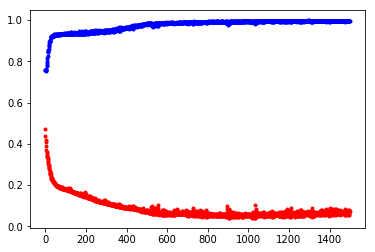

In [10]:
history = model.fit(X, Y, validation_split=0.33, epochs=1500, batch_size = 500)
y_vloss = history.history['val_loss']
y_acc = history.history['acc']
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c = "red", markersize = 3)
plt.plot(x_len, y_acc, "o", c = "blue", markersize = 3)

plt.show()

그래프를 보면 파란색 선이 학습셋 정확도, 빨간색 선이 테스트셋 오차다. <br>
epoch가 늘어날 수록 학습셋 정확도는 증가하지만 테스트 결과는 어느정도가 지나면 더 나아지지 않는걸 볼 수 있다 .